In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime
import os
import re
from tqdm import tqdm
%matplotlib inline
import warnings
import glob
warnings.simplefilter(action='ignore', category=FutureWarning)
#Last edited: 2024029 by JS
import poligrain as plg
import matplotlib.pyplot as plt
# Import from "/src/pypwsqc" does not work

#import sys
#sys.path.append('/home/IWS/seidel/github/pypwsqc/src/pypwsqc')
#import pwspyqc_dev_js as pyqc

import pypwsqc.pwspyqc_dev_js as pyqc

#import scipy

In [3]:
!pwd

/home/IWS/seidel/github/pypwsqc/docs/notebooks


In [20]:
#ds_pws = xr.open_dataset("/home/IWS/seidel/PWS_data/RT_pws_res_1h/PWS_Reutlingen_v1.nc")
#ds_pws= xr.open_dataset('/home/IWS/seidel/PWS_data/EGLV_nc/EGLV_PWS_1h_v3.nc')
ds_pws = xr.open_dataset('private_data/PWS_Reutlingen_v1.nc')

In [21]:
ds_pws.load()

<xarray.Dataset>
Dimensions:    (time: 77405, id: 101)
Coordinates:
  * time       (time) datetime64[ns] 2014-12-31T23:00:00 ... 2023-10-31T03:00:00
  * id         (id) <U10 'RT_PWS_001' 'RT_PWS_002' ... 'RT_PWS_102' 'RT_PWS_103'
    elevation  (id) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    lat        (id) float64 48.38 48.4 48.44 48.43 ... 48.54 48.55 48.54 48.54
    lon        (id) float64 9.425 9.331 9.368 9.382 ... 9.202 9.2 9.232 9.234
Data variables:
    rainfall   (id, time) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    title:                 PWS data from Reutlingen
    file author:           Jochen Seidel
    institution:           University of Stuttgart
    date:                  2024-05-17
    source:                Netamo PWS
    history:               PWS data downloaded via API with duplicate coordin...
    naming convention:     OpenSense-0.1
    license restrictions:  CC-BY 4.0 https://creativecommons.org/licenses/by/...
    reference:             https://doi.org/10.1029/2019GL083731
    comment:

In [22]:
ds_pws.coords['x'], ds_pws.coords['y'] = plg.spatial.project_point_coordinates(
    ds_pws.lon, ds_pws.lat, target_projection="EPSG:25832",
)

In [23]:
ds_pws.shift(time=-1)

<xarray.Dataset>
Dimensions:    (time: 77405, id: 101)
Coordinates:
  * time       (time) datetime64[ns] 2014-12-31T23:00:00 ... 2023-10-31T03:00:00
  * id         (id) <U10 'RT_PWS_001' 'RT_PWS_002' ... 'RT_PWS_102' 'RT_PWS_103'
    elevation  (id) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    lat        (id) float64 48.38 48.4 48.44 48.43 ... 48.54 48.55 48.54 48.54
    lon        (id) float64 9.425 9.331 9.368 9.382 ... 9.202 9.2 9.232 9.234
    x          (id) float64 5.315e+05 5.245e+05 ... 5.171e+05 5.173e+05
    y          (id) float64 5.358e+06 5.361e+06 ... 5.376e+06 5.376e+06
Data variables:
    rainfall   (id, time) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    title:                 PWS data from Reutlingen
    file author:           Jochen Seidel
    institution:           University of Stuttgart
    date:                  2024-05-17
    source:                Netamo PWS
    history:               PWS data downloaded via API with duplicate coordin...
    naming convention:     OpenSense-0.1
    license restrictions:  CC-BY 4.0 https://creativecommons.org/licenses/by/...
    reference:             https://doi.org/10.1029/2019GL083731
    comment:

In [26]:
dist_mtx_pws, indcorr_mtx_pws = pyqc.calc_indic_corr_all_stns(
    ds_pws.rainfall, 
    ds_pws.rainfall, 
    prob=0.99,
    min_valid_overlap=2*24*30,
)

 15%|█████████████████████████▊                                                                                                                                                    | 15/101 [00:15<01:30,  1.06s/it]/Users/chwala-c/code/pypwsqc/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/chwala-c/code/pypwsqc/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [01:47<00:00,  1.07s/it]


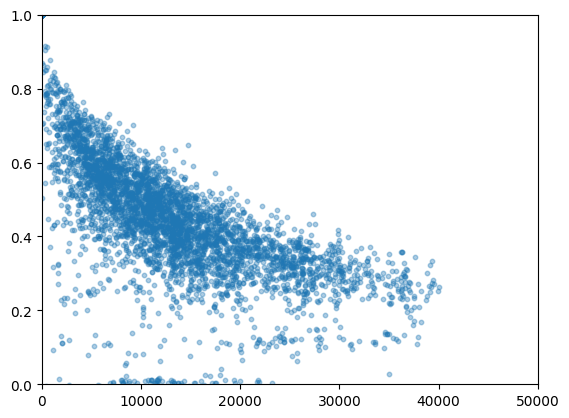

In [27]:
plt.scatter(dist_mtx_pws, indcorr_mtx_pws, alpha=0.2, s=10)
#plt.scatter(dist_mtx_ref, corr_mtx_ref, s=10)
plt.ylim(0, 1)
plt.xlim(0, 50e3);

In [28]:
ds_ref = xr.open_dataset('private_data/Reutlingen_Pluviodata_2024_v2_1hourly_qc.nc')
#ds_ref=xr.open_dataset("/home/IWS/seidel/RT_Pluviodata/10_netCDF_QC/Reutlingen_Pluviodata_2024_v2_1hourly_qc.nc")
ds_ref.load()
ds_ref.coords['x'], ds_ref.coords['y'] = plg.spatial.project_point_coordinates(
    ds_ref.longitude, ds_ref.latitude, target_projection="EPSG:25832",
)

In [33]:
dist_mtx_ref, indcorr_mtx_ref = pyqc.calc_indic_corr_all_stns(
    ds_ref.rainfall, 
    ds_ref.rainfall, 
    prob=0.99,
    min_valid_overlap=2*24*30,)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.26it/s]


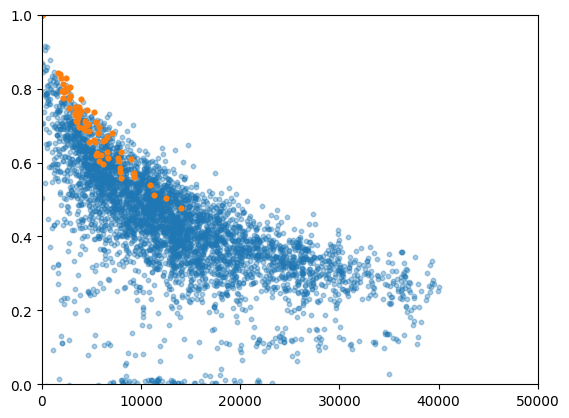

In [36]:
#plt.scatter(dist_vals, corr_vals, alpha=0.2, s=10)
plt.scatter(dist_mtx_pws, indcorr_mtx_pws, alpha=0.2, s=10)
plt.scatter(dist_mtx_ref, indcorr_mtx_ref, s=10)
plt.ylim(0, 1)
plt.xlim(0, 50e3);

In [354]:
# IMPORTANT !!!!!!!!!!!!
# I have switched the order of the first two arguments here
# so that dim `id` is the one of the PWS

dist_mtx_ref_pws, indcorr_mtx_ref_pws= pyqc.calc_indic_corr_all_stns(
    ds_pws.rainfall,#.sel(time=slice('2014-12-31T23:00:00','2023-10-31T03:00:00')), 
    ds_ref.rainfall.shift(time=-1),#.sel(time=slice('2014-12-31T23:00:00','2023-10-31T03:00:00')), 
    prob=0.99,
    min_valid_overlap=2*24*30,)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:15<00:00,  6.56it/s]


There seems to be a 1h time shift in the data (UTC vs. MEZ) which should not be

`ds_ref.rainfall.shift(time=-1)`

Incdator corrlation for all stations does not fill the whole matrix, let's check out why!

    for i in tqdm.tqdm(range(len(xy_a))):
        for j in range(len(xy_b)):

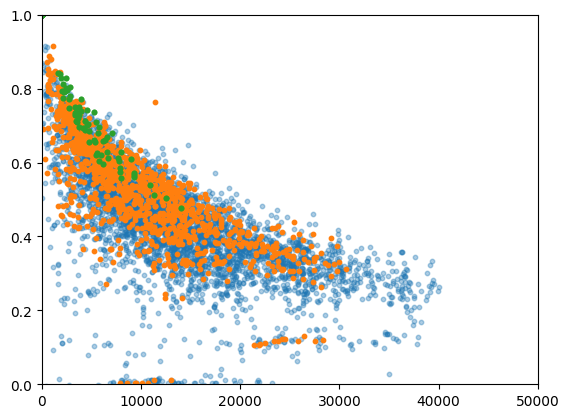

In [355]:
plt.scatter(dist_mtx_pws, indcorr_mtx_pws, alpha=0.2, s=10)
plt.scatter(dist_mtx_ref_pws, indcorr_mtx_ref_pws, s=10)
plt.scatter(dist_mtx_ref, indcorr_mtx_ref, s=10)
plt.ylim(0, 1)
plt.xlim(0, 50e3);

## WIP stuff with using `pandas` to bin and filter by indcorr

the stuff with `xarray` below is IMO better

<Axes: xlabel='dist'>

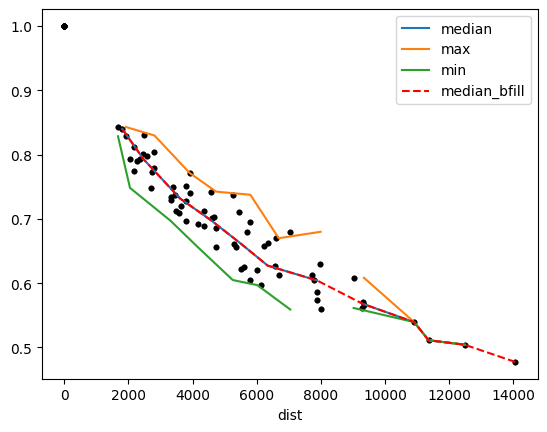

In [366]:
import pandas as pd

df = pd.DataFrame(
    {
        'dist': dist_mtx_ref.data.flatten(),
        'indcorr': indcorr_mtx_ref.data.flatten(),
    }
)
df = df.sort_values('dist')

#df = df.set_index('dist')

out = pd.cut(df.dist , bins=np.arange(0, 30e3, 1e3))

fig, ax = plt.subplots()
df.groupby(out).median().plot('dist', 'indcorr', ax=ax, label='median')
df.groupby(out).max().plot('dist', 'indcorr', ax=ax, label='max')
df.groupby(out).min().plot('dist', 'indcorr', ax=ax, label='min')
plt.scatter(dist_mtx_ref, indcorr_mtx_ref, s=10, color='k')

median_indcorr_filled = df.groupby(out).median().bfill()

median_indcorr_filled.plot('dist', 'indcorr', ax=ax, label='median_bfill', color='r', linestyle='--')


In [367]:
def bin_by_distance(dist, variable, bins):
    df = pd.DataFrame({'dist': dist, 'variable': variable})
    return df.variable.groupby(pd.cut(df.dist , bins=bins)).median().bfill()
    

bin_by_distance(dist=dist_mtx_ref.data.flatten(), variable=indcorr_mtx_ref.data.flatten(), bins=np.arange(0, 20e3, 1e3))

dist
(0.0, 1000.0]         0.839765
(1000.0, 2000.0]      0.839765
(2000.0, 3000.0]      0.793079
(3000.0, 4000.0]      0.731909
(4000.0, 5000.0]      0.697113
(5000.0, 6000.0]      0.660931
(6000.0, 7000.0]      0.627300
(7000.0, 8000.0]      0.604265
(8000.0, 9000.0]      0.568032
(9000.0, 10000.0]     0.568032
(10000.0, 11000.0]    0.539461
(11000.0, 12000.0]    0.511269
(12000.0, 13000.0]    0.504331
(13000.0, 14000.0]    0.477567
(14000.0, 15000.0]    0.477567
(15000.0, 16000.0]         NaN
(16000.0, 17000.0]         NaN
(17000.0, 18000.0]         NaN
(18000.0, 19000.0]         NaN
Name: variable, dtype: float64

## WIP stuff with `xarray` to bin and filter by indcorr

In [420]:
bins = np.arange(0, 30e3, 1e3)

binned_indcorr_ref = indcorr_mtx_ref.groupby_bins(
    dist_mtx_ref, bins=bins
).quantile(0.5).bfill(dim='group_bins')

binned_indcorr_ref

<xarray.DataArray (group_bins: 29)>
array([0.83976451, 0.83976451, 0.79307938, 0.73190945, 0.69711308,
       0.66093068, 0.62729987, 0.60426496, 0.5680317 , 0.5680317 ,
       0.53946114, 0.51126893, 0.5043306 , 0.47756705, 0.47756705,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan])
Coordinates:
  * group_bins  (group_bins) object (0.0, 1000.0] ... (28000.0, 29000.0]
    quantile    float64 0.5

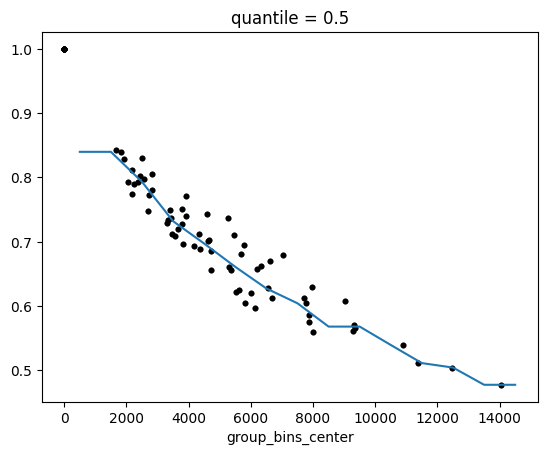

In [421]:
binned_indcorr_ref.plot()
plt.scatter(dist_mtx_ref, indcorr_mtx_ref, s=10, color='k')

In [422]:
pws_indcorr_good_list = []

for pws_id in indcorr_mtx_ref_pws.id.values:
    binned_indcorr_pws = indcorr_mtx_ref_pws.sel(id=pws_id).groupby_bins(
        dist_mtx_ref_pws.sel(id=pws_id), bins=bins
    ).median()
    pws_indcorr_good_list.append((binned_indcorr_pws + 0.02 > binned_indcorr_ref).any())

In [423]:
ds_pws['indcorr_good'] = xr.DataArray(
    data=pws_indcorr_good_list, 
    coords={'id': indcorr_mtx_ref_pws.id.values},
)

In [424]:
foo = indcorr_mtx_ref_pws.to_dataset(name='indcorr')
foo['dist'] = dist_mtx_ref_pws
foo['indcorr_good'] = (('id', pws_indcorr_good_list))
foo

<xarray.Dataset>
Dimensions:       (id: 101, id_neighbor: 12)
Coordinates:
  * id            (id) <U10 'RT_PWS_001' 'RT_PWS_002' ... 'RT_PWS_103'
  * id_neighbor   (id_neighbor) <U5 'RT_01' 'RT_02' 'RT_03' ... 'RT_11' 'RT_12'
Data variables:
    indcorr       (id, id_neighbor) float64 0.3068 0.3117 0.2955 ... 0.551 0.486
    dist          (id, id_neighbor) float64 2.499e+04 2.437e+04 ... 1.336e+04
    indcorr_good  (id) bool False False False False ... True True True True

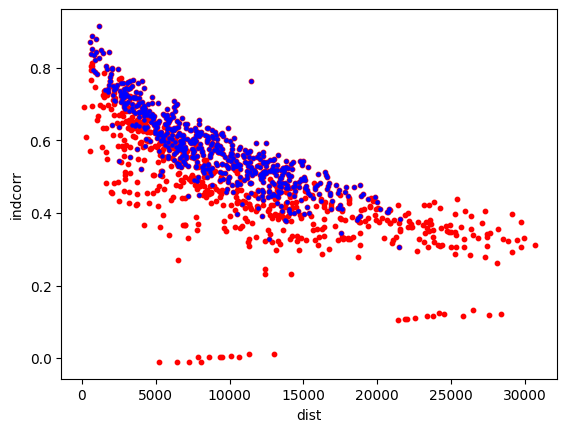

In [425]:
foo.plot.scatter(x='dist', y='indcorr', color='r', s=10)
foo.where(foo.indcorr_good).plot.scatter(x='dist', y='indcorr', color='b', s=5);

Thoughts for indicator correlation filter
- calculate corr_mtxs and dist_mtxs within function or as external input data (or both as options)
- different calcualtion for squared (PWS-PWS, REF-REF) or non-square (PWS-REF) 
- IndCorr to n-nearest REF Stations as parameter (e.g. 1-5)

Orgiginal Infocator Filter Algorithm 
- empty bool array form numer of stations (length of `id_neigbor`)
- interate over number of pws (`i`)
    + get pcp data from station `i`
    + drop NAN (required?)
    + get nearest/all primary stations
    + sort them according to distance
    + interate of number of primary stations from close to far (`j`)
        - check for suffcient overlapping data
        - calculate indcorr -> not required, can be taken from mtxs
        - va(?) does what? not clear
        - 



In [42]:
dist_mtx_pws.where(dim=("id","id_neighbor") = 18000)

SyntaxError: invalid syntax (2194748784.py, line 1)

In [140]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


In [139]:
x_data=dist_mtx_ref.values.ravel()
y_data=indcorr_mtx_ref.values.ravel()

In [147]:
x=np.sort(x_data)[12:]
y=np.sort(y_data)[::-1][12:]

In [148]:
popt, pcov = curve_fit(func, x, y)

/tmp/ipykernel_109960/718011236.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x, y)


In [149]:
a = popt[0]
b = popt[1]
c = popt[2]

In [152]:
x_fitted_curve_fit = np.linspace(np.min(x), np.max(x), 100)
y_fitted_curve_fit = a * np.exp(b * x_fitted_curve_fit)

/tmp/ipykernel_109960/2733162076.py:2: RuntimeWarning: overflow encountered in exp
  y_fitted_curve_fit = a * np.exp(b * x_fitted_curve_fit)


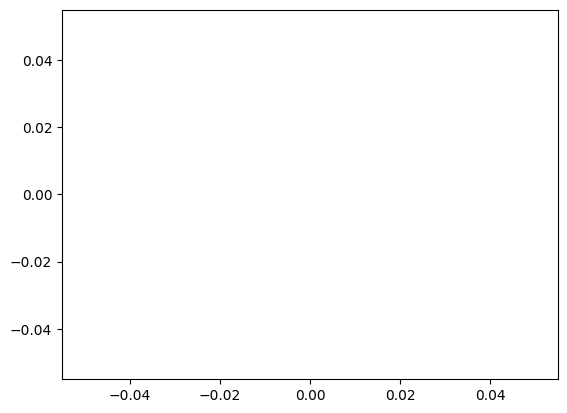

In [153]:
plt.plot(x_fitted_curve_fit, y_fitted_curve_fit)

   

In [117]:
func (10000, *popt)

0.6877354655744781

In [142]:
x[12:]

array([ 1675.45280245,  1675.45280245,  1809.63872856,  1809.63872856,
        1917.14743069,  1917.14743069,  2049.3243498 ,  2049.3243498 ,
        2168.38028874,  2168.38028874,  2182.50637845,  2182.50637845,
        2255.34731117,  2255.34731117,  2357.38649124,  2357.38649124,
        2446.23388252,  2446.23388252,  2486.05687777,  2486.05687777,
        2575.71680226,  2575.71680226,  2703.85914968,  2703.85914968,
        2730.18870408,  2730.18870408,  2809.60980736,  2809.60980736,
        2812.33784361,  2812.33784361,  3313.05262233,  3313.05262233,
        3339.83059831,  3339.83059831,  3401.22261457,  3401.22261457,
        3442.33299867,  3442.33299867,  3477.91710528,  3477.91710528,
        3563.11438   ,  3563.11438   ,  3646.18322929,  3646.18322929,
        3779.59721171,  3779.59721171,  3791.01063292,  3791.01063292,
        3806.18627851,  3806.18627851,  3914.03322627,  3914.03322627,
        3915.94380365,  3915.94380365,  4166.16615392,  4166.16615392,
      

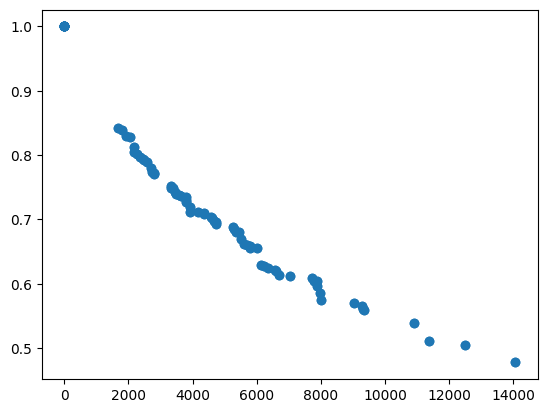

In [131]:
plt.scatter(x,y)

In [132]:
p=np.polyfit(x,np.log(y),1)

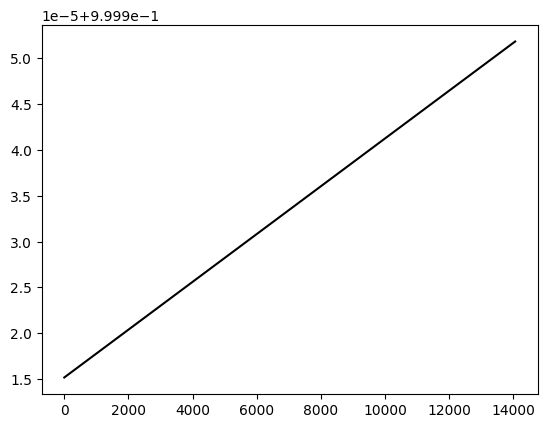

In [133]:
plt.plot(x_fitted, y_fitted, 'k', label='Fitted curve')

In [123]:
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = a * np.exp(b * x_fitted)

In [51]:
i=0
# select disnstaces to Ref for ith PWS
PwsDist2Ref=dist_mtx_ref_pws.isel(id_neighbor=i)

In [48]:
NearestRef=np.argsort(PwsDist2Ref)

In [46]:
PwsDist2RefSorted=PwsDist2Ref.sortby(PwsDist2Ref)

In [47]:
PwsDist2RefSorted

<xarray.DataArray (id: 12)>
array([18846.0871941 , 20485.47475082, 21006.50955356, 21058.91138181,
       21556.49588707, 21576.5357491 , 22719.01931143, 22823.71791847,
       23804.78356273, 24105.80141867, 24369.172     , 24985.71395355])
Coordinates:
  * id           (id) <U5 'RT_11' 'RT_10' 'RT_05' ... 'RT_06' 'RT_02' 'RT_01'
    id_neighbor  <U10 'RT_PWS_001'

In [49]:
j=NearestRef.values

In [52]:
i=0
for k in j:
    print(dist_mtx_ref_pws.isel(id_neighbor=i, id=k).values, indcorr_mtx_ref_pws.isel(id_neighbor=i, id=k).values)

18846.087194099546 0.34606346584608555
20485.474750821435 0.33199552703664187
21006.5095535636 0.3163492060620229
21058.911381806633 0.32488150353389833
21556.495887068042 0.34987677344879914
21576.535749099417 0.3548626619994953
22719.01931142669 0.2954810317936312
22823.717918470255 0.3289223824446779
23804.783562727127 0.3330869557640144
24105.80141867302 0.3122878250600918
24369.172000002636 0.311681736984885
24985.71395354815 0.30675591962427184


In [ ]:
indcorr_mtx_ref_pws

In [ ]:
ds_pws.rainfall.isel(id=0).time[0]

In [ ]:
start=max(ds_ref.rainfall.isel(id=0).time[0], ds_pws.rainfall.isel(id=0).time[0])
end=min(ds_ref.rainfall.isel(id=0).time[-1], ds_pws.rainfall.isel(id=0).time[-1])
print(start.data, end.data)

In [ ]:
#ds_ref.rainfall.isel(id=0).sel(time=str(start.data):str(end.data))
ds_ref.rainfall.isel(id=0).sel(time=slice('2014-12-31T23:00:00','2023-10-31T03:00:00'))

In [ ]:
i_bool_avail_data=np.isfinite(ds_ref.rainfall.isel(id=0))
j_bool_avail_data=np.isfinite(ds_pws.rainfall.isel(id=0))

In [ ]:
i_bool_avail_data=np.isfinite(ds_ref.rainfall.isel(id=0))


In [ ]:
np.sum([j_bool_avail_data, i_bool_avail_data], axis=0)

In [ ]:
ds_ref.rainfall.isel(id=0)[valid]

In [ ]:
ij_bool_avail_data = np.sum([i_bool_avail_data, j_bool_avail_data], axis=0) == 0

In [ ]:
pyqc.calc_indicator_correlation(ds_ref.rainfall.isel(id=0).sel(time=slice('2014-12-31T23:00:00','2023-10-31T03:00:00')), 
ds_pws.rainfall.isel(id=0).sel(time=slice('2014-12-31T23:00:00','2023-10-31T03:00:00')),  prob=0.99, exclude_nan=True, min_valid_overlap=24*30*2)

In [ ]:
ds_ref.rainfall.isel(id=0).plot()

Hier der Versuch über ´pandas´

In [39]:
# convert relevant xarrayDatasets to dataframes
dist_matrix_dwd_dwd = dist_mtx_ref.to_pandas()
dist_matrix_dwd_net = dist_mtx_ref_pws.to_pandas()
corr_dwd = corr_mtx_ref.to_pandas()
# one needs to be transposed, one not. Why?
prc_net = ds_pws.rainfall.to_pandas().T
prc_ref = ds_ref.rainfall.shift(time=-1).to_pandas()


In [40]:
dist_dwd, corr_dwd = pyqc.calc_indic_corr_all_stns(
    ds_ref.rainfall,
    ds_ref.rainfall,
    max_distance=50000, # this is in meters, assuming the projection units are also meters
    prob=0.99, 
    exclude_nan=True, 
    min_valid_overlap=None,)





  8%|▊         | 1/12 [00:00<00:01,  6.85it/s]

100%|██████████| 12/12 [00:01<00:00,  7.60it/s]


In [41]:
 # parameters 
prob=0.99
max_distance=50000,
min_req_ppt_vals=2*24*30
tolerance=0.8


stn_in = []
dist_stn_in = []

stn_notin = []
dist_stn_notin = []
 
 # the relevant dimension here ist the numer of PWS, i.e. shape[1]
 stn_in_bool = np.zeros(dist_matrix_dwd_net.shape[1], dtype=bool)
 # Interate over each PWS dataset
for i in tqdm(range(dist_matrix_dwd_net.shape[1])):
    # this is numpy, mabe also possbile with xarray?
    pws_stn = prc_net.iloc[:, i]
    pws_stn_nonan = pws_stn.dropna(how='all')
    print (len(pws_stn_nonan))

    ###############################################################
    ### CAUTION argsort return wrong results, needs to be checked!
    nearest_stn_ids = np.argsort(dist_matrix_dwd_net.iloc[:, i])
    ###############################################################
    #raise Exception
    for stn_id in nearest_stn_ids: 
        prim_stn = prc_ref.iloc[:, stn_id]
        prim_stn_nonan = prim_stn.dropna(how='all')

        ij_bool_avail_data = pws_stn_nonan.index.intersection(
        prim_stn_nonan.index)
        
        if len(ij_bool_avail_data) > min_req_ppt_vals:

            indi_corr = pyqc.calc_indicator_correlation(
            pws_stn_nonan.loc[ij_bool_avail_data].dropna(),
            prim_stn_nonan.loc[ij_bool_avail_data].dropna(),
            prob=prob, min_valid_overlap=min_req_ppt_vals)

            delta = 1000
            va  = corr_dwd.values[dist_dwd < dist_matrix_dwd_net.values[stn_id, i] + delta]
            add_distance = 1000
            while va.shape[0] < 5:
                va = corr_dwd[
                    dist_dwd < dist_matrix_dwd_net[
                        stn_id, i] + delta + add_distance]
                add_distance += delta
        
            if indi_corr > np.min(va*tolerance, 0):
                stn_in_bool[i] = True
                #print('PWS accepted')
                #if show_plot:
                #    stn_in.append(indi_corr)
                #    dist_stn_in.append(dist_matrix_dwd_net[stn_id, i])
            
            #else:
            #        stn_notin.append(indi_corr)
            #        dist_stn_notin.append(dist_matrix_dwd_net[stn_id, i])
                    #break
                

    print("Total Accepted", np.sum(stn_in_bool), dist_matrix_dwd_net.shape[1])
            

        

  0%|          | 0/101 [00:00<?, ?it/s]

21084
Total Accepted 0 101
44149


  2%|▏         | 2/101 [00:00<00:10,  9.29it/s]

  5%|▍         | 5/101 [00:00<00:05, 16.97it/s]

Total Accepted 1 101
174
Total Accepted 1 101
20257
Total Accepted 1 101
174
Total Accepted 1 101
20538
Total Accepted 2 101
63772


  8%|▊         | 8/101 [00:00<00:09,  9.91it/s]

Total Accepted 3 101
61054
Total Accepted 4 101
26326


 10%|▉         | 10/101 [00:00<00:08, 10.64it/s]

Total Accepted 4 101
14752
Total Accepted 4 101
12593
Total Accepted 5 101
23722


 12%|█▏        | 12/101 [00:01<00:07, 11.40it/s]

Total Accepted 6 101
9708
Total Accepted 7 101
55092


 14%|█▍        | 14/101 [00:01<00:08, 10.83it/s]

Total Accepted 8 101
69017
Total Accepted 8 101
5339


 16%|█▌        | 16/101 [00:01<00:08,  9.97it/s]

Total Accepted 9 101
16463
Total Accepted 10 101
74289


 20%|█▉        | 20/101 [00:01<00:07, 10.43it/s]

Total Accepted 11 101
4590
Total Accepted 12 101
22275
Total Accepted 13 101
13393
Total Accepted 14 101
26909


 22%|██▏       | 22/101 [00:02<00:07, 11.05it/s]

Total Accepted 15 101
31635
Total Accepted 16 101
45719


 26%|██▌       | 26/101 [00:02<00:07, 10.60it/s]

Total Accepted 16 101
16021
Total Accepted 17 101
23464
Total Accepted 17 101
74618


 28%|██▊       | 28/101 [00:02<00:08,  8.63it/s]

Total Accepted 18 101
42319
Total Accepted 19 101
14681
Total Accepted 20 101
47073


 31%|███       | 31/101 [00:03<00:08,  8.53it/s]

Total Accepted 21 101
46693
Total Accepted 22 101
70122


 34%|███▎      | 34/101 [00:03<00:06,  9.75it/s]

Total Accepted 23 101
7824
Total Accepted 24 101
10131
Total Accepted 25 101
27836
Total Accepted 26 101
5622


 38%|███▊      | 38/101 [00:03<00:05, 11.72it/s]

Total Accepted 27 101
13953
Total Accepted 27 101
19670
Total Accepted 28 101
26936


 40%|███▉      | 40/101 [00:03<00:05, 10.38it/s]

Total Accepted 29 101
48370
Total Accepted 30 101
25975


 44%|████▎     | 44/101 [00:04<00:04, 12.65it/s]

Total Accepted 31 101
175
Total Accepted 31 101
19039
Total Accepted 32 101
14126
Total Accepted 33 101
175
Total Accepted 33 101
27667


 48%|████▊     | 48/101 [00:04<00:03, 13.69it/s]

Total Accepted 34 101
44244
Total Accepted 35 101
174
Total Accepted 35 101
22166


 50%|████▉     | 50/101 [00:04<00:04, 11.27it/s]

Total Accepted 36 101
60727
Total Accepted 37 101
520
Total Accepted 37 101
24821


 51%|█████▏    | 52/101 [00:04<00:03, 12.91it/s]

Total Accepted 38 101
43746
Total Accepted 39 101
58257


 53%|█████▎    | 54/101 [00:05<00:04, 10.03it/s]

Total Accepted 40 101
66043


 57%|█████▋    | 58/101 [00:05<00:03, 11.02it/s]

Total Accepted 41 101
197
Total Accepted 41 101
18233
Total Accepted 42 101
5913
Total Accepted 43 101
41106


 59%|█████▉    | 60/101 [00:05<00:03, 11.32it/s]

Total Accepted 44 101
3077
Total Accepted 44 101
3080
Total Accepted 45 101
67231


 61%|██████▏   | 62/101 [00:05<00:03, 10.49it/s]

Total Accepted 46 101
11922
Total Accepted 47 101
75010


 63%|██████▎   | 64/101 [00:06<00:04,  9.25it/s]

Total Accepted 48 101
65106
Total Accepted 49 101
8943


 68%|██████▊   | 69/101 [00:06<00:02, 11.36it/s]

Total Accepted 50 101
166
Total Accepted 50 101
15002
Total Accepted 51 101
23405
Total Accepted 52 101
185
Total Accepted 52 101
18553


 71%|███████▏  | 72/101 [00:06<00:02, 12.70it/s]

Total Accepted 53 101
30495
Total Accepted 54 101
25297
Total Accepted 55 101
2432


 73%|███████▎  | 74/101 [00:06<00:02, 13.32it/s]

Total Accepted 56 101
40167
Total Accepted 57 101
47068


 75%|███████▌  | 76/101 [00:07<00:02, 11.04it/s]

Total Accepted 58 101
46660
Total Accepted 59 101
36277


 80%|████████  | 81/101 [00:07<00:01, 12.63it/s]

Total Accepted 60 101
2438
Total Accepted 61 101
5876
Total Accepted 62 101
8110
Total Accepted 63 101
16953
Total Accepted 64 101
42134


 82%|████████▏ | 83/101 [00:07<00:01, 11.78it/s]

Total Accepted 65 101
46743
Total Accepted 66 101
56057


 86%|████████▌ | 87/101 [00:08<00:01, 10.31it/s]

Total Accepted 67 101
25854
Total Accepted 68 101
18522
Total Accepted 69 101
4799


 88%|████████▊ | 89/101 [00:08<00:01, 11.71it/s]

Total Accepted 69 101
17960
Total Accepted 70 101
17953
Total Accepted 71 101
31964


 92%|█████████▏| 93/101 [00:08<00:00, 12.30it/s]

Total Accepted 72 101
5766
Total Accepted 73 101
26645
Total Accepted 74 101
8249
Total Accepted 75 101
14142


 96%|█████████▌| 97/101 [00:08<00:00, 14.37it/s]

Total Accepted 76 101
18789
Total Accepted 77 101
7381
Total Accepted 78 101
18057
Total Accepted 79 101
17729


 98%|█████████▊| 99/101 [00:08<00:00, 14.24it/s]

Total Accepted 80 101
17330
Total Accepted 81 101
74677


100%|██████████| 101/101 [00:09<00:00, 10.94it/s]

Total Accepted 82 101


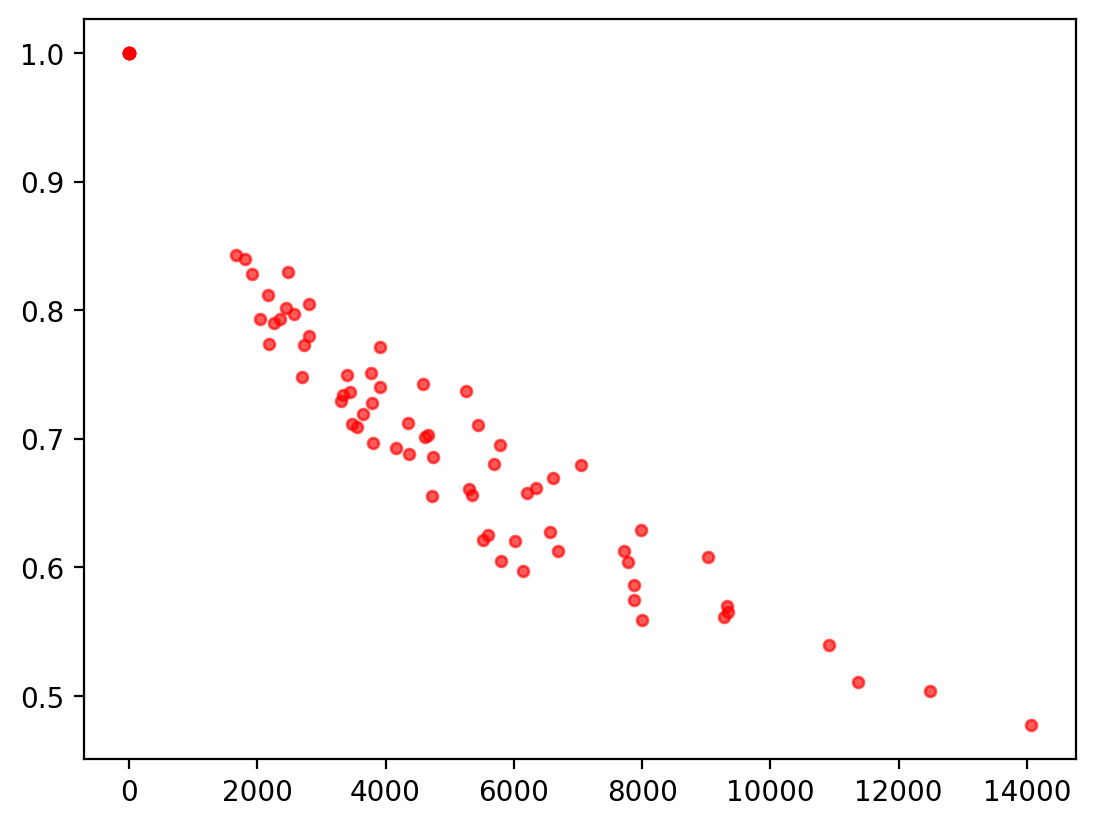

In [49]:
plt.figure(dpi=200)
plt.scatter(dist_stn_in, stn_in, alpha=0.4, s=15, c='blue',
                    label='PWS-Prim. In n=%d' % np.sum(stn_in_bool*1))
plt.scatter(dist_dwd, corr_dwd, alpha=0.4, s=15, c='red',
                    label='Prim.-Prim.')
plt.scatter(dist_stn_notin, stn_notin, alpha=0.4, s=15, c='grey',
                    label='PWS-Prim. Out n=%d' % (
                        len(stn_in_bool) - np.sum(stn_in_bool*1)))

In [42]:
corr_dwd.values[dist_dwd < dist_matrix_dwd_net.values[stn_id, i] + delta]

array([1.        , 0.77983069, 0.79289296, 0.68552437, 0.6885934 ,
       0.66992834, 0.65611972, 0.60836328, 0.56571095, 0.57454931,
       0.55910887, 0.47756705, 0.77983069, 1.        , 0.79701106,
       0.77394247, 0.73635943, 0.72775693, 0.71164211, 0.65806671,
       0.61269208, 0.62141374, 0.5969833 , 0.51126893, 0.79289296,
       0.79701106, 1.        , 0.7495463 , 0.7932658 , 0.69558388,
       0.72964459, 0.62935814, 0.60426496, 0.6205357 , 0.60488464,
       0.5043306 , 0.68552437, 0.77394247, 0.7495463 , 1.        ,
       0.80473158, 0.8296447 , 0.83976451, 0.74233824, 0.70157276,
       0.7341743 , 0.69265339, 0.57035245, 0.6885934 , 0.73635943,
       0.7932658 , 0.80473158, 1.        , 0.73743576, 0.84289633,
       0.67992931, 0.6621064 , 0.7119695 , 0.69707712, 0.53946114,
       0.66992834, 0.72775693, 0.69558388, 0.8296447 , 0.73743576,
       1.        , 0.77103965, 0.80144877, 0.70882557, 0.71963813,
       0.66093068, 0.58611448, 0.65611972, 0.71164211, 0.72964

In [43]:
dist_dwd

<xarray.DataArray (id: 12, id_neighbor: 12)>
array([[    0.        ,  2812.33784361,  2357.38649124,  4734.56038809,
         4368.55442861,  6603.09747148,  5346.63769402,  9021.97424265,
         9343.08155085,  7881.08295158,  7992.55865435, 14057.70974092],
       [ 2812.33784361,     0.        ,  2575.71680226,  2182.50637845,
         3442.33299867,  3791.01063292,  3477.91710528,  6212.4547515 ,
         6686.57577306,  5518.56288382,  6138.71377284, 11359.1258605 ],
       [ 2357.38649124,  2575.71680226,     0.        ,  3401.22261457,
         2049.3243498 ,  5778.21287177,  3313.05262233,  7981.02816725,
         7783.09232167,  6018.32050597,  5802.37395216, 12480.68867236],
       [ 4734.56038809,  2182.50637845,  3401.22261457,     0.        ,
         2809.60980736,  2486.05687777,  1809.63872856,  4579.97917879,
         4608.57410532,  3339.83059831,  4166.16615392,  9326.04697039],
       [ 4368.55442861,  3442.33299867,  2049.3243498 ,  2809.60980736,
            0.        ,  5252.67498917,  1675.45280245,  7044.63573201,
         6341.74201707,  4343.47837526,  3806.18627851, 10908.77076031],
       [ 6603.09747148,  3791.01063292,  5778.21287177,  2486.05687777,
         5252.67498917,     0.        ,  3914.03322627,  2446.23388252,
         3563.11438   ,  3646.18322929,  5301.27284343,  7879.91786624],
       [ 5346.63769402,  3477.91710528,  3313.05262233,  1809.63872856,
         1675.45280245,  3914.03322627,     0.        ,  5446.77342481,
         4669.67684702,  2730.18870408,  2703.85914968,  9272.54528557],
       [ 9021.97424265,  6212.4547515 ,  7981.02816725,  4579.97917879,
         7044.63573201,  2446.23388252,  5446.77342481,     0.        ,
         2255.34731117,  3779.59721171,  5696.46684477,  5603.02586138],
       [ 9343.08155085,  6686.57577306,  7783.09232167,  4608.57410532,
         6341.74201707,  3563.11438   ,  4669.67684702,  2255.34731117,
            0.        ,  2168.38028874,  3915.94380365,  4723.44658589],
       [ 7881.08295158,  5518.56288382,  6018.32050597,  3339.83059831,
         4343.47837526,  3646.18322929,  2730.18870408,  3779.59721171,
         2168.38028874,     0.        ,  1917.14743069,  6566.1621585 ],
       [ 7992.55865435,  6138.71377284,  5802.37395216,  4166.16615392,
         3806.18627851,  5301.27284343,  2703.85914968,  5696.46684477,
         3915.94380365,  1917.14743069,     0.        ,  7715.57232337],
       [14057.70974092, 11359.1258605 , 12480.68867236,  9326.04697039,
        10908.77076031,  7879.91786624,  9272.54528557,  5603.02586138,
         4723.44658589,  6566.1621585 ,  7715.57232337,     0.        ]])
Coordinates:
  * id           (id) <U5 'RT_01' 'RT_02' 'RT_03' ... 'RT_10' 'RT_11' 'RT_12'
  * id_neighbor  (id_neighbor) <U5 'RT_01' 'RT_02' 'RT_03' ... 'RT_11' 'RT_12'

In [44]:
corr_dwd

<xarray.DataArray (id: 12, id_neighbor: 12)>
array([[1.        , 0.77983069, 0.79289296, 0.68552437, 0.6885934 ,
        0.66992834, 0.65611972, 0.60836328, 0.56571095, 0.57454931,
        0.55910887, 0.47756705],
       [0.77983069, 1.        , 0.79701106, 0.77394247, 0.73635943,
        0.72775693, 0.71164211, 0.65806671, 0.61269208, 0.62141374,
        0.5969833 , 0.51126893],
       [0.79289296, 0.79701106, 1.        , 0.7495463 , 0.7932658 ,
        0.69558388, 0.72964459, 0.62935814, 0.60426496, 0.6205357 ,
        0.60488464, 0.5043306 ],
       [0.68552437, 0.77394247, 0.7495463 , 1.        , 0.80473158,
        0.8296447 , 0.83976451, 0.74233824, 0.70157276, 0.7341743 ,
        0.69265339, 0.57035245],
       [0.6885934 , 0.73635943, 0.7932658 , 0.80473158, 1.        ,
        0.73743576, 0.84289633, 0.67992931, 0.6621064 , 0.7119695 ,
        0.69707712, 0.53946114],
       [0.66992834, 0.72775693, 0.69558388, 0.8296447 , 0.73743576,
        1.        , 0.77103965, 0.80144877, 0.70882557, 0.71963813,
        0.66093068, 0.58611448],
       [0.65611972, 0.71164211, 0.72964459, 0.83976451, 0.84289633,
        0.77103965, 1.        , 0.7106597 , 0.70332074, 0.77268254,
        0.74818467, 0.56142079],
       [0.60836328, 0.65806671, 0.62935814, 0.74233824, 0.67992931,
        0.80144877, 0.7106597 , 1.        , 0.78990263, 0.75148107,
        0.68029347, 0.62494397],
       [0.56571095, 0.61269208, 0.60426496, 0.70157276, 0.6621064 ,
        0.70882557, 0.70332074, 0.78990263, 1.        , 0.81219716,
        0.74007658, 0.65590373],
       [0.57454931, 0.62141374, 0.6205357 , 0.7341743 , 0.7119695 ,
        0.71963813, 0.77268254, 0.75148107, 0.81219716, 1.        ,
        0.82838251, 0.62729987],
       [0.55910887, 0.5969833 , 0.60488464, 0.69265339, 0.69707712,
        0.66093068, 0.74818467, 0.68029347, 0.74007658, 0.82838251,
        1.        , 0.6129462 ],
       [0.47756705, 0.51126893, 0.5043306 , 0.57035245, 0.53946114,
        0.58611448, 0.56142079, 0.62494397, 0.65590373, 0.62729987,
        0.6129462 , 1.        ]])
Coordinates:
  * id           (id) <U5 'RT_01' 'RT_02' 'RT_03' ... 'RT_10' 'RT_11' 'RT_12'
  * id_neighbor  (id_neighbor) <U5 'RT_01' 'RT_02' 'RT_03' ... 'RT_11' 'RT_12'

In [45]:
va = corr_dwd.values[dist_dwd < dist_matrix_dwd_net.values[stn_id, i] + delta]

In [46]:
dist_matrix_dwd_net.iloc[:,i].values.argsort()


array([ 2,  0,  4,  1,  6,  3,  5, 10,  9,  8,  7, 11])

In [47]:
dist_matrix_dwd_net.iloc[:,i].values

array([ 1914.90864219,  3102.6831578 ,   878.84430697,  4234.63460213,
        2815.47854263,  6553.05995766,  4180.2240283 ,  8806.31736958,
        8659.19555407,  6893.25442391,  6613.03779697, 13359.07884698])

In [48]:
dist_matrix_dwd_net.iloc[:,i]

id
RT_01     1914.908642
RT_02     3102.683158
RT_03      878.844307
RT_04     4234.634602
RT_05     2815.478543
RT_06     6553.059958
RT_07     4180.224028
RT_08     8806.317370
RT_09     8659.195554
RT_10     6893.254424
RT_11     6613.037797
RT_12    13359.078847
Name: RT_PWS_103, dtype: float64

Hier der Versuch mit reinem ´xarray´

In [ ]:
# Bezogen auf Code von Abbas


dist_mtx_ref #-> dist_matrix_dwd_net


In [ ]:
dist_mtx_ref.values

In [ ]:
 # the relevant dimension here ist the numer of PWS, i.e. shape[1]
 stn_in_bool = np.zeros(dist_mtx_ref.shape[1], dtype=bool)
 # Interate over each PWS dataset
for i in tqdm(range(dist_mtx_ref.shape[1])):
    # this is numpy, mabe also possbile with xarray?
    pws_stn = ds_pws.rainfall.values[i,:]
    pws_stn_nonan = pws_stn[~np.isnan(pws_stn)]
    print (len(pws_stn_nonan))
    
    nearest_stn_ids = np.argsort(dist_mtx_ref.values[:, i])
    #raise Exception

In [ ]:
len(pws_stn_nonan)

In [ ]:
plt.scatter(dist_mtx_ref, indcorr_mtx_ref)

In [ ]:
ds_pws.rainfall.cumsum(dim='time').plot.line(x='time', add_legend=False);

In [ ]:
#End of the line weil 'calc_indicator_correlation' eine square matrix braucht!

In [ ]:
distance_matrix = plg.spatial.calc_point_to_point_distances(
    ds_pws,
    ds_ref,
)

distance_matrix


In [ ]:
tri2 = np.zeros((12, 12))
tri2[np.triu_indices(12, 1)] = corr_vals_ref


Function only for filtering based in the indicator correlations. Should take dist_vals and corr_vals (xr.DataArray) as input

In [ ]:
import scipy
import tqdm

In [ ]:
da_a=ds_ref
da_b=ds_ref

In [ ]:
da_a.id

In [ ]:
max_distance=50000 # this is in meters, assuming the projection units are also meters
prob=0.99
exclude_nan=True 
min_valid_overlap=None

In [ ]:
  for i in tqdm.tqdm(range(len(xy_a) - 1)):
    print(i)
    for j in range(i + 1, len(xy_b)):
            # check if distance between stations is less than max_distance
            if dist_mtx[i, j] < max_distance:
              print(i,j)
              indcorr_mtx[i,j]  = calc_indicator_correlation(
                    da_a.isel(id=i).rainfall.data, 
                    da_b.isel(id=j).rainfall.data,
                    prob=prob,
                    exclude_nan=exclude_nan, 
                    min_valid_overlap=min_valid_overlap,
                )
                #list_dist.append(dist_mtx[i, j])
                #list_corr.append(indi_corr)

In [ ]:
a=da_a.isel(id=i).rainfall.data
b=da_b.isel(id=j).rainfall.data

In [ ]:
    a_dataset = np.copy(a)
    b_dataset = np.copy(b)

In [ ]:
both_not_nan = ~np.isnan(a_dataset) & ~np.isnan(b_dataset)
a_dataset = a_dataset[both_not_nan]
b_dataset = b_dataset[both_not_nan]


In [ ]:
ix=int((a_dataset.shape[0])*prob)

In [ ]:
 ix = int(a_dataset.shape[0] * prob)

In [ ]:
np.nan(a)

In [ ]:
indcorr_mtx[i,j] = 1

In [ ]:
pyqc.calc_indicator_correlation(
    a, 
    b,
    prob=prob,
    exclude_nan=exclude_nan, 
    min_valid_overlap=min_valid_overlap)

In [ ]:
hupsi= dist_vals=xr.DataArray(dist_vals, data={'id' : da_a.id , 'id_neighbor' : da_b.id })

In [ ]:
import scipy

In [ ]:
ds = xr.open_dataset('/home/IWS/seidel/PWS_data/EGLV_nc/EGLV_PWS_1h_v3.nc')

In [ ]:
N = 50000
a = np.random.randn(N, 2)
b = np.random.randn(N, 2)

In [ ]:
cdist = scipy.spatial.distance.cdist(a, b)
distance_matrix = scipy.spatial.distance_matrix(a, b)

In [ ]:
plg.spatial.calc_point_to_point_distances(ds,ds)

In [ ]:
plg.spatial.get_closest_points_to_point(ds,ds,max_distance=50000,n_closest=1000)